## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [15]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [16]:
train, test = keras.datasets.cifar10.load_data()

In [17]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [18]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [19]:
def build_mlp3(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = keras.layers.Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = keras.layers.Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

def build_mlp5(input_shape, output_units=10, num_neurons=[1024, 512, 256, 128, 64], drp_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = keras.layers.Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = keras.layers.Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [20]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.3, 0.25, 0.2, 0.1]


In [21]:
results_mlp3 = {}
results_mlp5 = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for drp_ratio in Dropout_EXP:
    exp_tag = 'drp-%s' % str(drp_ratio)
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    
    model1 = build_mlp3(input_shape=x_train.shape[1:], drp_ratio=drp_ratio)    
    model1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    model1.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test), shuffle=True)
    
    train_loss1 = model1.history.history['loss']
    valid_loss1 = model1.history.history['val_loss']
    train_acc1 = model1.history.history['acc']
    valid_acc1 = model1.history.history['val_acc']
    
    results_mlp3[exp_tag] = {'train_loss': train_loss1,
                             'valid_loss': valid_loss1,
                             'train_acc': train_acc1,
                             'valid_acc': valid_acc1}
    
    model2 = build_mlp5(input_shape=x_train.shape[1:], drp_ratio=drp_ratio)
    model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    model2.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test), shuffle=True)
    
    train_loss2 = model2.history.history['loss']
    valid_loss2 = model2.history.history['val_loss']
    train_acc2 = model2.history.history['acc']
    valid_acc2 = model2.history.history['val_acc']
    
    results_mlp5[exp_tag] = {'train_loss': train_loss2,
                             'valid_loss': valid_loss2,
                             'train_acc': train_acc2,
                             'valid_acc': valid_acc2}

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 21s 422us/step - loss: 2.0799 - acc: 0.2321 - val_loss: 1.8739 - val_acc: 0.3160
Epoch 2/50
50000/50000 [==============================] - 18s 366us/step - loss: 1.9195 - acc: 0.2953 - val_loss: 1.8026 - val_acc: 0.3616
Epoch 3/50
50000/50000 [==============================] - 19s 380us/step - loss: 1.8592 - acc: 0.3221 - val_loss: 1.7650 - val_acc: 0.3781
Epoch 4/50
50000/50000 [==============================] - 20s 408us/step - loss: 1.8315 - acc: 0.3338 - val_loss: 1.7462 - val_acc: 0.3870
Epoch 5/50
50000/50000 [==============================] - 16s 318us/step - loss: 1.8167 - acc: 0.3357 - val_loss: 1.7520 - val_acc: 0.3828
Epoch 6/50
50000/50000 [==============================] - 16s 315us/step - loss: 1.7924 - acc: 0.3478 - val_loss: 1.7147 - val_acc: 0.4058
Epoch 7/50
50000/50000 [==============================] - 18s 365us/step - loss: 1.7713 - acc: 0.3571 - val_loss: 1.

Epoch 9/50
50000/50000 [==============================] - 28s 551us/step - loss: 1.8904 - acc: 0.2906 - val_loss: 1.8274 - val_acc: 0.3368
Epoch 10/50
50000/50000 [==============================] - 26s 526us/step - loss: 1.8774 - acc: 0.3004 - val_loss: 1.8350 - val_acc: 0.3390
Epoch 11/50
50000/50000 [==============================] - 31s 611us/step - loss: 1.8629 - acc: 0.3103 - val_loss: 1.8158 - val_acc: 0.3457
Epoch 12/50
50000/50000 [==============================] - 29s 583us/step - loss: 1.8560 - acc: 0.3105 - val_loss: 1.8124 - val_acc: 0.3423
Epoch 13/50
50000/50000 [==============================] - 32s 645us/step - loss: 1.8473 - acc: 0.3151 - val_loss: 1.7858 - val_acc: 0.3656
Epoch 14/50
50000/50000 [==============================] - 27s 545us/step - loss: 1.8335 - acc: 0.3220 - val_loss: 1.7764 - val_acc: 0.3600
Epoch 15/50
50000/50000 [==============================] - 26s 527us/step - loss: 1.8253 - acc: 0.3294 - val_loss: 1.7869 - val_acc: 0.3777
Epoch 16/50
50000/500

50000/50000 [==============================] - 14s 284us/step - loss: 1.5962 - acc: 0.4264 - val_loss: 1.5293 - val_acc: 0.4621
Epoch 18/50
50000/50000 [==============================] - 14s 278us/step - loss: 1.5885 - acc: 0.4288 - val_loss: 1.5112 - val_acc: 0.4663
Epoch 19/50
50000/50000 [==============================] - 14s 282us/step - loss: 1.5880 - acc: 0.4270 - val_loss: 1.5049 - val_acc: 0.4630
Epoch 20/50
50000/50000 [==============================] - 14s 280us/step - loss: 1.5725 - acc: 0.4317 - val_loss: 1.5112 - val_acc: 0.4644
Epoch 21/50
50000/50000 [==============================] - 14s 275us/step - loss: 1.5775 - acc: 0.4323 - val_loss: 1.5090 - val_acc: 0.4609
Epoch 22/50
50000/50000 [==============================] - 14s 283us/step - loss: 1.5636 - acc: 0.4382 - val_loss: 1.5087 - val_acc: 0.4614
Epoch 23/50
50000/50000 [==============================] - 14s 285us/step - loss: 1.5546 - acc: 0.4394 - val_loss: 1.5017 - val_acc: 0.4666
Epoch 24/50
50000/50000 [=======

50000/50000 [==============================] - 25s 509us/step - loss: 1.6381 - acc: 0.4105 - val_loss: 1.5842 - val_acc: 0.4372
Epoch 26/50
50000/50000 [==============================] - 25s 494us/step - loss: 1.6337 - acc: 0.4122 - val_loss: 1.5769 - val_acc: 0.4514
Epoch 27/50
50000/50000 [==============================] - 25s 490us/step - loss: 1.6317 - acc: 0.4157 - val_loss: 1.5780 - val_acc: 0.4463
Epoch 28/50
50000/50000 [==============================] - 25s 492us/step - loss: 1.6202 - acc: 0.4184 - val_loss: 1.5853 - val_acc: 0.4442
Epoch 29/50
50000/50000 [==============================] - 25s 506us/step - loss: 1.6154 - acc: 0.4209 - val_loss: 1.5652 - val_acc: 0.4553
Epoch 30/50
50000/50000 [==============================] - 25s 504us/step - loss: 1.6154 - acc: 0.4242 - val_loss: 1.5498 - val_acc: 0.4578
Epoch 31/50
50000/50000 [==============================] - 25s 499us/step - loss: 1.6006 - acc: 0.4267 - val_loss: 1.5426 - val_acc: 0.4578
Epoch 32/50
50000/50000 [=======

50000/50000 [==============================] - 14s 280us/step - loss: 1.4377 - acc: 0.4817 - val_loss: 1.4051 - val_acc: 0.4984
Epoch 34/50
50000/50000 [==============================] - 14s 283us/step - loss: 1.4249 - acc: 0.4878 - val_loss: 1.4106 - val_acc: 0.4973
Epoch 35/50
50000/50000 [==============================] - 17s 332us/step - loss: 1.4279 - acc: 0.4844 - val_loss: 1.4082 - val_acc: 0.4959
Epoch 36/50
50000/50000 [==============================] - 15s 294us/step - loss: 1.4255 - acc: 0.4880 - val_loss: 1.4284 - val_acc: 0.4990
Epoch 37/50
50000/50000 [==============================] - 14s 279us/step - loss: 1.4230 - acc: 0.4887 - val_loss: 1.3863 - val_acc: 0.5034
Epoch 38/50
50000/50000 [==============================] - 14s 286us/step - loss: 1.4198 - acc: 0.4872 - val_loss: 1.3950 - val_acc: 0.5048
Epoch 39/50
50000/50000 [==============================] - 14s 283us/step - loss: 1.4117 - acc: 0.4927 - val_loss: 1.3973 - val_acc: 0.5065
Epoch 40/50
50000/50000 [=======

50000/50000 [==============================] - 24s 477us/step - loss: 1.5205 - acc: 0.4575 - val_loss: 1.4930 - val_acc: 0.4745
Epoch 42/50
50000/50000 [==============================] - 24s 479us/step - loss: 1.5107 - acc: 0.4594 - val_loss: 1.5019 - val_acc: 0.4635
Epoch 43/50
50000/50000 [==============================] - 24s 477us/step - loss: 1.5035 - acc: 0.4624 - val_loss: 1.4926 - val_acc: 0.4763
Epoch 44/50
50000/50000 [==============================] - 24s 479us/step - loss: 1.5054 - acc: 0.4632 - val_loss: 1.5002 - val_acc: 0.4775
Epoch 45/50
50000/50000 [==============================] - 24s 480us/step - loss: 1.4989 - acc: 0.4652 - val_loss: 1.4941 - val_acc: 0.4711
Epoch 46/50
50000/50000 [==============================] - 24s 479us/step - loss: 1.4962 - acc: 0.4640 - val_loss: 1.4769 - val_acc: 0.4737
Epoch 47/50
50000/50000 [==============================] - 24s 477us/step - loss: 1.4952 - acc: 0.4663 - val_loss: 1.4680 - val_acc: 0.4795
Epoch 48/50
50000/50000 [=======

50000/50000 [==============================] - 13s 266us/step - loss: 1.1294 - acc: 0.5917 - val_loss: 1.3507 - val_acc: 0.5283
Epoch 50/50
50000/50000 [==============================] - 13s 268us/step - loss: 1.1195 - acc: 0.5932 - val_loss: 1.3469 - val_acc: 0.5294
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 27s 537us/step - loss: 2.3031 - acc: 0.1552 - val_loss: 1.9984 - val_acc: 0.2451
Epoch 2/50
50000/50000 [==============================] - 24s 482us/step - loss: 1.9611 - acc: 0.2665 - val_loss: 1.8286 - val_acc: 0.3383
Epoch 3/50
50000/50000 [==============================] - 24s 483us/step - loss: 1.8440 - acc: 0.3268 - val_loss: 1.7600 - val_acc: 0.3574
Epoch 4/50
50000/50000 [==============================] - 24s 489us/step - loss: 1.7820 - acc: 0.3530 - val_loss: 1.6855 - val_acc: 0.3885
Epoch 5/50
50000/50000 [==============================] - 24s 479us/step - loss: 1.7339 - acc: 0.3762 - val_loss: 1.6405 - val

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


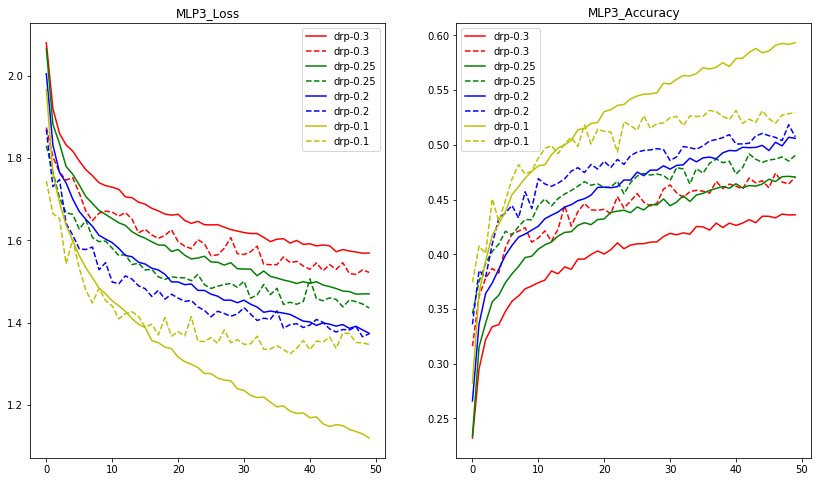

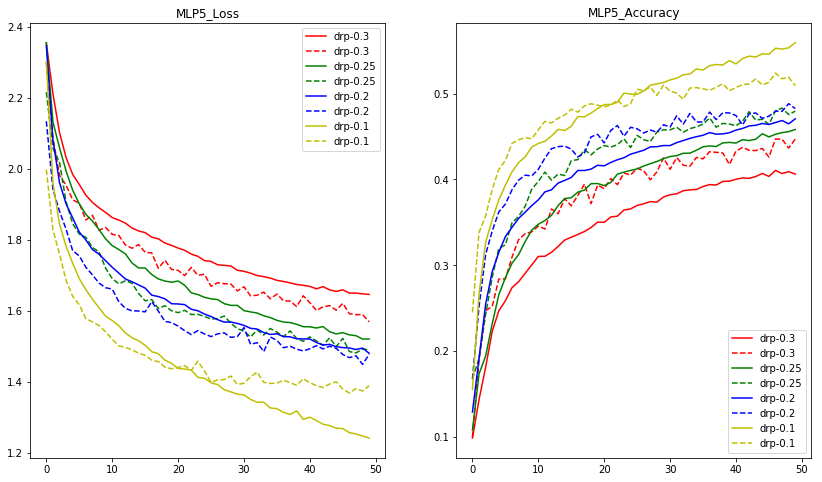

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y"]

plt.figure(figsize=(14, 8))
for i, exp_tag in enumerate(results_mlp3.keys()):
    plt.subplot(121)
    plt.plot(range(len(results_mlp3[exp_tag]['train_loss'])), results_mlp3[exp_tag]['train_loss'], '-', 
             label=exp_tag, color=color_bar[i])
    plt.plot(range(len(results_mlp3[exp_tag]['valid_loss'])), results_mlp3[exp_tag]['valid_loss'], '--',
             label=exp_tag, color=color_bar[i])
    plt.title('MLP3_Loss')
    plt.legend()
    
    plt.subplot(122)
    plt.plot(range(len(results_mlp3[exp_tag]['train_acc'])), results_mlp3[exp_tag]['train_acc'], '-', 
             label=exp_tag, color=color_bar[i])
    plt.plot(range(len(results_mlp3[exp_tag]['valid_acc'])), results_mlp3[exp_tag]['valid_acc'], '--',
             label=exp_tag, color=color_bar[i])
    plt.title('MLP3_Accuracy')
    plt.legend()
plt.show()

plt.figure(figsize=(14, 8))
for i, exp_tag in enumerate(results_mlp5.keys()):
    plt.subplot(121)
    plt.plot(range(len(results_mlp5[exp_tag]['train_loss'])), results_mlp5[exp_tag]['train_loss'], '-', 
             label=exp_tag, color=color_bar[i])
    plt.plot(range(len(results_mlp5[exp_tag]['valid_loss'])), results_mlp5[exp_tag]['valid_loss'], '--',
             label=exp_tag, color=color_bar[i])
    plt.title('MLP5_Loss')
    plt.legend()
    
    plt.subplot(122)
    plt.plot(range(len(results_mlp5[exp_tag]['train_acc'])), results_mlp5[exp_tag]['train_acc'], '-', 
             label=exp_tag, color=color_bar[i])
    plt.plot(range(len(results_mlp5[exp_tag]['valid_acc'])), results_mlp5[exp_tag]['valid_acc'], '--',
             label=exp_tag, color=color_bar[i])
    plt.title('MLP5_Accuracy')
    plt.legend()
plt.show()